In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + ECONOMIC INDEX - DATA COMPOSITION 3 (90-5-5).csv')
df.head(5)

,Month,Tourist Arrival,CCI,PMI,REERI,Class
0,01/01/2008,399556,98,53,109,Train
1,01/02/2008,411032,91,53,108,Train
2,01/03/2008,414332,90,53,106,Train
3,01/04/2008,395900,83,56,106,Train
4,01/05/2008,366387,80,57,106,Train


In [3]:
import datetime
df['Month'] = pd.to_datetime(df['Month'])
df['Month'] = df['Month'].dt.strftime('%d.%m.%Y')
df['Month'] = pd.DatetimeIndex(df['Month']).dayofyear

In [4]:
x=df.drop('Tourist Arrival', axis=1)
y=df['Tourist Arrival']

In [5]:
train = df[df["Class"] == "Train"]
validation = df[df["Class"] == "Validation"]
test = df[df["Class"] == "Test"]
print(train.shape)
print(validation.shape)
print(test.shape)

(168, 6)
(9, 6)
(9, 6)


In [6]:
train = train.drop(['Class'], axis=1)
validation = validation.drop(['Class'], axis=1)
test = test.drop(['Class'], axis=1)

In [7]:
target_column_train = ['Tourist Arrival']
predictors_train = list(set(list(train.columns))-set(target_column_train))

x_train = train[predictors_train].values
y_train = train[target_column_train].values


print(x_train.shape)
print(y_train.shape)

(168, 4)
(168, 1)


In [8]:
target_column_validation = ['Tourist Arrival'] 
predictors_validation = list(set(list(validation.columns))-set(target_column_validation))

x_validation = validation[predictors_validation].values
y_validation = validation[target_column_validation].values

print(x_validation.shape)
print(y_validation.shape)

(9, 4)
(9, 1)


In [9]:
target_column_test = ['Tourist Arrival'] 
predictors_test = list(set(list(test.columns))-set(target_column_test))

x_test = test[predictors_test].values
y_test = test[target_column_test].values

print(x_test.shape)
print(y_test.shape)

(9, 4)
(9, 1)


In [10]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(solver='sgd',
                  hidden_layer_sizes=20,
                  max_iter=10000,
                  learning_rate='constant',
                  shuffle=False,
                  random_state=9876,
                  activation='tanh')
nn.fit(x_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', hidden_layer_sizes=20, max_iter=10000,
             random_state=9876, shuffle=False, solver='sgd')

In [16]:
params = {'solver': ['lbfgs', 'sgd', 'adam'],
          'hidden_layer_sizes': [10,20,30,40,50],
          'learning_rate': ['constant', 'invscaling', 'adaptive'],
          'shuffle': [True, False],
          'activation': ['identity', 'logistic', 'tanh', 'relu']}

In [ ]:
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(estimator=nn, param_grid=params, cv=10)

In [ ]:
gs=gs.fit(x_train, y_train)

In [ ]:
best_params=gs.best_params_

In [11]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [12]:
y_pred=nn.predict(x_test)
print(y_pred)

[764395.15680118 764395.15680118 764395.15680118 764395.15680118
 764395.15680118 764395.15680118 764395.15680118 764395.15680118
 764395.15680118]


In [13]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 177154.3568565291


In [14]:
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 165937.61439960563


In [15]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 0.2216035372293111


In [16]:
def SMAPE(y_test,y_pred):
    return 100/len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))
result = SMAPE(y_test,y_pred)
print("SMAPE :", result)

SMAPE : 193.37893654958026


In [17]:
def RMSPE(y_test, y_pred):
    return np.sqrt(np.nanmean(np.square(((y_test - y_pred) / y_test))))*100
result1 = RMSPE(y_test,y_pred)
print("RMSPE :", result1)

RMSPE : 26.090533134408084


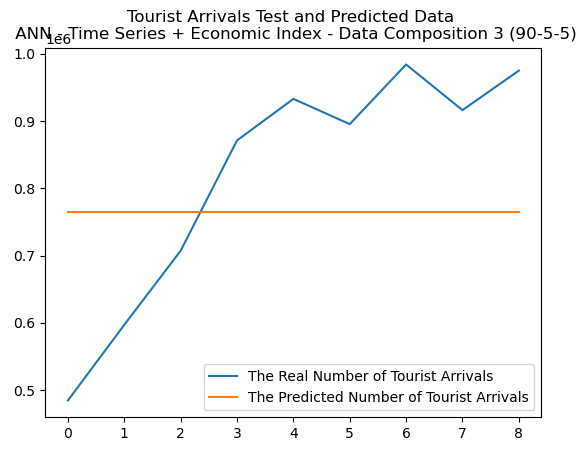

In [18]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n ANN - Time Series + Economic Index - Data Composition 3 (90-5-5)")
plt.legend()
plt.show()